In [ ]:
# Performance of the Model at Production?

In [ ]:
Train/Validation - Test -> Independent

In [ ]:
model -> trained on Train/Val
model.score(X_test, y_test) -> 

In [ ]:
X, y ->

res = cross_val_score(Model(...), X, y, scoring = 'accuracy', cv = 5)

In [1]:
res = [0.98, 0.92, 0.9, 0.99, 0.87]

In [2]:
import numpy as np

In [4]:
np.mean(res)

0.932

In [5]:
np.std(res)

0.04621688003316536

In [ ]:
 # Statistics:
In a normal Distribution with mean of Mu and Standard Deviation of S
%68 -> [Mu-S, Mu+S]
%95 -> [Mu-2S, Mu+2S]
%99.7 -> [Mu-3S, Mu+3S]

In [6]:
[0.932 - 0.046, 0.932 + 0.046]

[0.886, 0.9780000000000001]

In [7]:
[0.932 - 2*0.046, 0.932 + 2*0.046]

[0.8400000000000001, 1.024]

In [8]:
[0.932 - 3*0.046, 1]

[0.794, 1]

In [9]:
from sklearn.model_selection import KFold, StratifiedKFold, LeaveOneOut

In [10]:
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

In [55]:
from sklearn.datasets import load_iris

In [56]:
data = load_iris()

In [57]:
import pandas as pd
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [54]:
B = kfold.split(X, y)

In [53]:
ans = []
for i, j in B:
    X_train = X[i]
    X_test = X[j]
    
    y_train = y[i]
    y_test = y[j]
    
    model = Model()
    model.fit(X_train, y_train)
    ans.append(model.score(X_test, y_test))

[  7  33  40  51  54  62  63  71  73  76  86 100 107 114 134]
[  8  16  22  24  26  37  44  45  66  78  90  93  97 121 126]
[  2  10  18  27  43  59  61  83  84  92 112 127 132 137 141]
[ 50  56  60  69  80 106 108 116 119 123 133 135 144 146 147]
[ 13  15  20  30  48  52  64  85  89  91  94  95 101 111 125]
[  3   6  11  12  46  68  96  98 102 104 109 110 120 128 149]
[  1   4   5  17  38  41  42  53 105 113 124 129 139 143 148]
[  0  23  28  31  32  34  35  55  57  65  74  75 118 131 138]
[ 14  19  25  29  49  72  77  79  82  99 115 122 130 136 145]
[  9  21  36  39  47  58  67  70  81  87  88 103 117 140 142]


In [20]:
def fun(X):
    res = []
    for i in X:
        res.append(i**2)
    return res

In [21]:
fun([1,2,3,4,5])

[1, 4, 9, 16, 25]

In [ ]:
# Generator -> return: yield

In [22]:
def fun2(X):
    for i in X:
        yield i**2

In [23]:
fun([1,2,3,4,5])

[1, 4, 9, 16, 25]

In [33]:
A = fun2([1,2,3,4,5])

In [34]:
list(A)

[1, 4, 9, 16, 25]

In [35]:
!pip install memory-profiler

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for memory-profiler: filename=memory_profiler-0.60.0-py3-none-any.whl size=31278 sha256=78a7602cad899fc981c81365f7977e8322247a2433d7b41d5740d6f91d3255ab
  Stored in directory: c:\users\parva\appdata\local\pip\cache\wheels\67\2b\fb\326e30d638c538e69a5eb0aa47f4223d979f502bbdb403950f
Successfully built memory-profiler


You should consider upgrading via the 'c:\users\parva\anaconda3\python.exe -m pip install --upgrade pip' command.


In [36]:
import memory_profiler

In [39]:
memory_profiler.memory_usage()

[165.34765625]

In [40]:
A1 = fun(range(10000000))

In [41]:
memory_profiler.memory_usage()

[548.4140625]

In [42]:
del A1

In [43]:
memory_profiler.memory_usage()

[165.10546875]

In [44]:
A2 = fun2(range(10000000))

In [45]:
memory_profiler.memory_usage()

[165.10546875]

In [46]:
j = 0
for i in A2:
    print(i)
    j += 1
    if j>10:
        break

0
1
4
9
16
25
36
49
64
81
100


In [48]:
next(A2)

144

In [58]:
# Scaling / Normalization / Standardization
# Linear scaling
[0,1] -> X: (X - min(X))/(max(X)-min(X))

mu = 0, std = 1 -> X: (X-mu)/std

In [63]:
X.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [65]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [61]:
scaler = MinMaxScaler()
Xs = scaler.fit_transform(X)

In [71]:
Xs1 = pd.DataFrame(Xs, columns=data.feature_names)

In [66]:
scaler = StandardScaler()
X[....] = scaler.fit_transform(X[.....])

In [70]:
Xs2 = pd.DataFrame(Xs2, columns=data.feature_names)

In [69]:
import seaborn as sns

C:\Users\parva\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal length (cm)'>

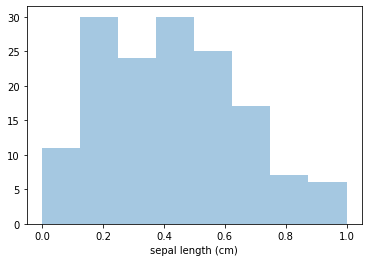

In [74]:
sns.distplot(Xs1['sepal length (cm)'], kde = False)

<AxesSubplot:xlabel='sepal length (cm)', ylabel='Density'>

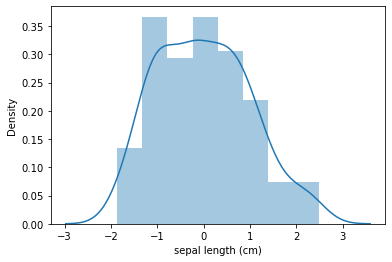

In [75]:
sns.distplot(Xs2['sepal length (cm)'], kde = True)

In [ ]:
# Cost Function to be not elongated -> minimization process faster
# Regularization (L1, L2): YOU MUST perform scaling first!

In [ ]:
98% 1% 1%

60% 20% 20%

In [ ]:
Tran / Val / Test
Ideal: Test and Val coming from the same distribution!